# Time Series Forecasting

What is your name? Include all team members if submitting as a group.
- Kim Buesser
From what perspective are you conducting the analysis? (Who are you? / Who are you working for?)
- I am a data scientist at Swire, attempting to reduce production line downtime by predicting breakages.
What is your question?
- When will the most important line items breakdown and can I effectively predict the breakdowns before they occur so that we can replace the part during downtime. This will reduce production line downtime and increase overall profits.
Describe your dataset(s) including URL (if available).
- The data: You have access to the IWC dataset, along with a functional location mapping dataset, containing records of the IWC work orders and where the orders link to, respectively.
Here’s a look at an exploded view or a data dictionary for each column.
IWC_Work_Orders_Extract.csv
This data contains 1,427,264 rows exclusively of all the information that has been fed into IWC. Below are the columns and what they mean:
Column Name
Definition
ORDER_ID
An identifier used to uniquely map every order raised in IWC
PLANT_ID
Helps uniquely identify all factories of Swire Coca-Cola, between Monza, Cota, Silverstone, Monaco, Roma and Suzuka
PRODUCTION_LOCATION
Text description of Plant_ID
EXECUTION_START_DATE
The date on which work began on the said issue
EXECUTION_FINISH_DATE
The date on which work ended to resolve said issue
ACTUAL_START_TIME
The time at which work began on resolving said issue*
ACTUAL_FINISH_TIME
The time at which work ended on resolving said issue*
ACTUAL_WORK_IN_MINUTES
The time it took, in minutes, to resolve said issue*
MAINTENANCE_PLAN
If the maintenance task was planned, this would have the plan ID. If this column is null, that implies that the maintenance was unplanned
MAINTENANCE_ITEM
If the maintenance task was planned, for example, this bearing needs to be changed every six weeks, then the plan in the IWC system will have code allocated to it, saying this bearing code  a maintenance will repeat at X interval and the serial number you see in this column maps to bearings (Mapping not provided for security reasons)
MAINTENANCE_ACTIVITY_TYPE
Lets you know if the maintenance was planned or unplanned, as an additional flag
ORDER_DESCRIPTION
The description entered by the mechanic as to what was the actual work that was carried out in said fix
MAINTENANCE_TYPE_DESCRIPTION
Tells you if the work order was preventive in nature, i.e. done to prevent breakdowns in future, or corrective in nature, i.e. done to correct something that caused a downtime
FUNCTIONAL_LOC
Works like an IP address. Helps locate each machine by plant – process – sub process – product line – machine. Is broken down into nodes for better analysis
FUNCTIONAL_AREA_NODE_1_MODIFIED
The functional area within said plant – Production, fleet, HVAC, etc.
FUNCTIONAL_AREA_NODE_2_MODIFIED
The region-based subset of the functional area – Is it the blender room, the assembly lines – can, bottle or bibs
FUNCTIONAL_AREA_NODE_3_MODIFIED
Within each region, which subset of equipment does this work order belong to
FUNCTIONAL_AREA_NODE_4_MODIFIED
Within line groupings, which line is it specifically referring to – contains line number
FUNCTIONAL_AREA_NODE_5_MODIFIED
Further splits the line into individual machine types
EQUIPMENT_ID
Within a filler, there are close to 60 smaller components. This will help us identify which component the work was done on within that filler, for example 
EQUIPMENT_DESC5
Helps us identify what that component is. Mind you, we won’t always have a description because some components are either too small to be classified or proprietary and hence undisclosed
EQUIPMENT_CAT_DESC
Identifies if the fixed part was on a machine, a vehicle, an HVAC system, etc.
EQUIP_START_UP_DATE
The date on which this machine was acquired **
EQUIP_VALID_FROM
The date on which this machine became functional **
EQUIP_VALID_TO
The date until which this machine shall be used **


What is(are) your independent variable(s) and dependent variable(s)? Include variable type (binary, categorical, numeric). If you have many variables, you can list the most important and summarize the rest (e.g. important variables are... also, 12 other binary, 5 categorical...).
- independent variable is month (time) and dependent variable is breakdowns for LINES40CANLINE

How are your variables suitable for your analysis method?
In time series analysis, the selection of variables is critical for modeling and forecasting future values based on past observations. In your case, you are working with two variables: Month (as the time index) and ORDER_ID (as the target variable). Here’s how these variables are suited for time series analysis:

1. Time Component: Month
Chronological Order: The Month variable represents time in a continuous and ordered manner. This is crucial for time series analysis as it allows the model to identify trends, seasonality, and cyclic patterns in the data over time.
Frequency: Using a monthly frequency helps in capturing seasonal effects that may occur annually. For example, if there are fluctuations in ORDER_ID based on the month (e.g., higher orders during holiday seasons), the model can learn from these patterns.
Regular Intervals: Time series analysis generally assumes regular intervals between observations. Having data organized by months fulfills this requirement, enabling the model to assess how values change over those regular periods.

2. Target Variable: ORDER_ID
Quantitative Measure: The ORDER_ID variable serves as a quantitative measure that the model aims to predict. It is a continuous variable that can reflect various aspects of the business, such as sales volume, customer demand, or order frequency.
Variability: The variability in ORDER_ID over time is essential for a robust time series analysis. This variability allows the model to capture and understand fluctuations and trends that might affect future values.
Relevance: The target variable must be relevant to the underlying question or business problem. In this case, predicting future ORDER_ID values could be critical for inventory management, sales forecasting, and resource allocation.

Additional Considerations
Stationarity: For many time series models (like ARIMA), it is assumed that the series is stationary, meaning its statistical properties (mean, variance, etc.) do not change over time. Preprocessing steps such as differencing or transformation may be necessary if the series shows trends or seasonality.
Autocorrelation: Time series data often exhibit autocorrelation, where past values influence future values. By analyzing the autocorrelation and partial autocorrelation functions (ACF and PACF), you can identify how many lags of the target variable (e.g., past ORDER_ID values) should be included in the model.
Explanatory Variables: Depending on the complexity of the analysis, you may consider adding exogenous variables that could influence ORDER_ID, such as marketing campaigns, promotions, or economic indicators, to enrich the model’s predictive capability.

Conclusion
Both Month and ORDER_ID are well-suited for time series analysis due to their inherent temporal structure and the quantitative nature of the data. The time component allows for capturing trends and seasonal effects, while the target variable represents a continuous measure of interest. 

What are your conclusions (include references to one or two CLEARLY INDICATED AND IMPORTANT graphs or tables in your output)?

Conclusions from the ARIMA Model

Model Specification:
The chosen ARIMA model was ARIMA(0, 1, 1), which indicates:
No autoregressive terms (p = 0). See Auto Arima section
Differencing was required once (d = 1) to achieve stationarity.
One moving average term (q = 1) was included.

Model Performance: See Auto ARIMA
The AIC (Akaike Information Criterion) value of 892.577 suggests that this model is reasonably good for the data, with lower AIC values generally indicating a better fit when comparing different models.
The Pseudo R-squared value of -0.0168 is quite low, indicating that the model does not explain a significant proportion of the variance in the data. However, this is common in time series models.
The OLS R-squared value of 0.3342 indicates that around 33.42% of the variance in ORDER_ID is explained by the model, which is moderate.

Residuals Analysis: See Residuals
The residuals show the differences between the predicted and actual ORDER_ID values. The residuals were normally distributed around 0 and were randomly appearing over time

Significance of Coefficients: See Coefficients
The coefficient for the MA(1) term (-0.5311) is statistically significant (p-value < 0.001), indicating a strong relationship between the current value and the previous error term.
The high significance suggests that past forecast errors significantly influence the current forecast.

Conclusions from the Facebook Prophet Model
Model Fit:
The R2 for the Prophet model were overall better than either ARIMA model, which indicates that it captures the underlying patterns better than ARIMA.
Interpretation of Forecasts: See Prophet Model
The predictions made by Prophet can be visually inspected against the actual data. Consistent forecasting accuracy over time periods can lead to better strategic decisions for inventory management, marketing strategies, and resource allocation.
Seasonal Effects:
If seasonal patterns were detected, it indicates that ORDER_ID varies by month, which is crucial for planning and forecasting.
Overall Conclusions
Model Comparison: Prophet model immediately was able to predict more of variance of the model suggesting that it is a better fit for this data.
Business Insights: The models can help in making informed business decisions by predicting future breakdowns, allowing for better inventory management and resource allocation.
Future Analysis: Further analysis can include refining the models with additional exogenous variables or exploring other modeling techniques (e.g., seasonal decomposition or advanced machine learning methods).
Recommendations
Refinement: Based on residual analysis, consider refining the model by adding terms or transforming the data if needed.
Validation: Validate the model with out-of-sample data to ensure robustness.
Continuous Monitoring: As new data becomes available, continuously update and validate the model to adapt to changes in patterns.
What are your assumptions and limitations? What robustness checks did you perform or would you perform?
Assumptions of the Models
1. ARIMA Model Assumptions:

Linearity: The relationship between past values (lags) and the current value is linear. Non-linear relationships may not be captured effectively by ARIMA.
Stationarity: The time series data should be stationary, meaning that the mean, variance, and autocovariance are constant over time. Differencing is often used to achieve stationarity.
Independence of Errors: The residuals (errors) of the model should be uncorrelated (white noise). Autocorrelations in residuals indicate model misspecification.
Normality of Errors: The residuals should be approximately normally distributed, especially for statistical inference regarding coefficients.
No Significant Outliers: The presence of outliers can significantly impact the model's performance and parameter estimates.

2. Facebook Prophet Assumptions:

Additivity: Prophet assumes that the time series is a sum of seasonal components, trend components, and holiday effects. This assumption may not hold if the relationships are multiplicative or if there are interactions between components.
Seasonality and Trend: The model assumes that seasonal and trend effects do not change over time unless specified otherwise (e.g., using change points).
Missing Data Handling: Prophet can handle missing data but assumes that the underlying structure of the time series is consistent.

Limitations of the Models
ARIMA Limitations:
Parameter Selection: Choosing the correct parameters (p, d, q) can be challenging and may require trial and error or automated methods like ACF and PACF analysis.
Non-linear Patterns: ARIMA struggles to capture non-linear relationships or complex seasonal patterns unless extended to seasonal ARIMA (SARIMA).
Out-of-Sample Forecasting: The model may not perform well when predicting beyond the training data, particularly in volatile environments.

Facebook Prophet Limitations:
Overfitting: The model may overfit if too many seasonalities or holidays are included, leading to poor generalization.
Complex Seasonal Patterns: While Prophet handles seasonality well, it may not capture intricate patterns that evolve over time, especially if they are non-linear.
Data Requirements: Prophet requires a certain amount of historical data to detect trends and seasonality effectively.

Robustness Checks
To validate the results and ensure that the models are robust, you could perform the following checks:

Completed: Residual Analysis: See Residuals
Autocorrelation Function (ACF): Check ACF and PACF plots of the residuals to identify any remaining autocorrelation.
Normality Tests: Use tests like the Shapiro-Wilk test or the Kolmogorov-Smirnov test to assess the normality of residuals.

Not Completed:
Out-of-Sample Validation:
Train/Test Split: Assess the model’s performance on a holdout dataset to evaluate how well it predicts unseen data.
Cross-Validation: Use time series cross-validation techniques, such as rolling forecasting origin, to assess model stability and performance over different time horizons.
Sensitivity Analysis:
Parameter Sensitivity: Analyze how changes in model parameters affect the outcomes, particularly in the ARIMA model.
Inclusion of Exogenous Variables: Test the robustness of the model by including additional explanatory variables that might affect ORDER_ID.

Alternative Models:
Compare with Other Models: Evaluate how other models (like SARIMA, Seasonal Decomposition of Time Series, or machine learning models) perform compared to ARIMA and Prophet.
Check with Different Specifications: Run models with different configurations and see how results vary.
Use of Additional Performance Metrics:
Beyond MSE and R-squared, consider metrics like MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and MAPE (Mean Absolute Percentage Error) for a comprehensive evaluation.

In [24]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/e7/c7/dcbf0c80920d8674970fef4e89bde7dc439a318a6180fcaa6bd65d8420ef/pmdarima-2.0.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.2/656.2 kB 4.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/41/46/75309abde08c10f9be78bcfca581be430b5d8303d847de8d88190f4d5c21/prophet-1.1.6-py3-none-macosx_10_11_x86_64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/0f/69/fa78950f99c0add5222f693d13b987b642aa778bca63fb9aaaca365be16c/holidays-0.58-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/Users/kimbuesser/Downloads/IWC_Work_Orders_Extract.csv')

/var/folders/cv/w5d_fnzs4d9730q33hncrkt80000gn/T/ipykernel_60624/1971187252.py:1: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/kimbuesser/Downloads/IWC_Work_Orders_Extract.csv')


## Repairs
Here  I want to understand what parts are being repaired at all the plants. If I can get a part that is repaired regularly, and has a consitent trend over time then I can implement a time series model to predict the next time it will need to be repaired and repair it during manufacturing downtime so that it does not interfere with production.

In [14]:
grouped_data = df.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].count()
grouped_data

FUNCTIONAL_AREA_NODE_2_MODIFIED
AIR  SYSTEMS                          565
AIR SYSTEMS                          3088
AMMONIA & REFRIGERATION SYSTEMS       835
BOTTLE LINE                         27543
BTL_PET_LINE                        32789
CAN LINE                            34208
CHEMICAL ROOM                          14
CIP SYSTEMS                           333
CO2                                  2159
CO2 SYSTEMS                           305
COMMON EQUIPMENT                     3069
COMMON EQUIPMENT/PRD LINES            773
COOLER SERVICE HVAC                  2699
ELECTRICAL SYSTEMS                     14
FLEET FUNCTIONAL AREAS                123
G812 AIR  SYSTEMS                     199
G812 CIP SYSTEMS                       18
G812 CO2                               79
G812 PRD FILLER_ROTARY_CAN          17390
G812 PRD FILLER_ROT_BTL_PET         11200
G812 PRODUCTION                        21
G812 QUALITY ASSURANCE EQUIPMENT       17
G812 RECYCLING                        158
G8

### String Cleaning Breakage Column
Some parts are coming through with slightly different names, so I will be implementing a string cleaning function to better group and understand the data.

In [4]:
df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = df['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.replace(r' |&|SYSTEMS|G812|TREATMENT|,|-|L(1|2|4|6)|LINES?(1|8|2|3)|2|9|1|410|3|PRD|S$', r'', regex=True)

In [5]:
def label_value(x):
    if x == 'BTL_PET_LINE':
        return 'PETBOTTLELINES'
    else:
        return x

df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = df['FUNCTIONAL_AREA_NODE_2_MODIFIED'].apply(label_value)
grouped_data = df.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].count()
grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
CANLINE                      34208
PETBOTTLELINES               32789
LINESBOTTLELINE              29729
FILLER_ROTARY_CAN            28189
BOTTLELINE                   27543
LINES40CANLINE               23153
PETBOTTLELINE                22460
ROTARY_CAN_LINE              14016
FILLER_ROT_BTL_PET           11200
LINEPETBOTTLELINE             8153
SHOP/REPAIRAREA               5514
SYRUP/BLENDINGROOM            5274
WATER                         4795
LINECAN                       3959
AIR                           3852
REFRIGERATION                 3567
COMMONEQUIPMENT               3069
RECYCLING                     2775
COOLERSERVICEHVAC             2699
CO                            2543
STEAM                         2313
WASTEWATER                    1666
LINE8BIBLINE                  1197
OFFICE                         903
AMMONIAREFRIGERATION           835
HEATING                        805
COMMONEQUIPMENT/LINE           773
PRODUCTION/FACILITIE   

## History of Most Common Breakdowns
Here I want to understand the most common breakdowns. Once I can do that, I can focus my time series forecasting on the parts that breakdown most frequently and result in production line stoppages. Being able to predict breakages and fix them during downtime will have the highest return on investment.

In [7]:
grouped_data = df.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].count()
grouped_data = grouped_data.reset_index()

# Rename the count column
grouped_data = grouped_data.rename(columns={'MAINTENANCE_ACTIVITY_TYPE': 'Activity_Count'})

df_for_list = grouped_data[grouped_data['Activity_Count']> 10000]
breakdown_list = df_for_list['FUNCTIONAL_AREA_NODE_2_MODIFIED'].tolist()

## Graphs and Model Choice
In the graphs below we can see that the trend in breakdowns is pretty consistent across all the most commonly replaces parts with a few spikes, followed by big drops (potentially meaning major breakdowns resulting in equipment replacement). I fear ARIMA is not an agile enough model to handle these types of trends as compared to much more flexible models such as the fb Prophet model because of this spike/drop variability. ARIMA functions well with consistent time series trends, which really is not realistic (example this data, merchant dollars over time, even time sensor data and weather). 

Facebook Prophet is a much more modern, flexible time series forecasting model, designed to handle time series data with missing values, seasonality, and outliers. It uses an additive model, breaking down the data into components like trend, seasonality, and holidays. It's more robust to handling seasonal variations (daily, weekly, yearly). It can model seasonality explicitly and allows user-defined events/holidays. The best use case for Prophet model is business-related time series data with seasonality, such as sales and website traffic.

Whereas, ARIMA requires the time series to be stationary or transformed to stationary (by differencing). ARIMA doesn’t handle seasonality well. ARIMA requires manual parameter tuning (AR, I, MA components). ARIMA assumes linear relationships in data. Prophet can model more complex, nonlinear trends.
In summary, ARIMA is a powerful but traditional model that works well for stationary, linear time series data, while Prophet is more flexible, particularly in handling seasonality and missing data, and is easier to use with non-stationary, real-world business data. 

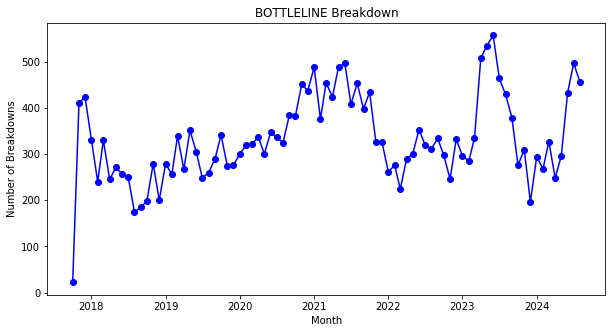

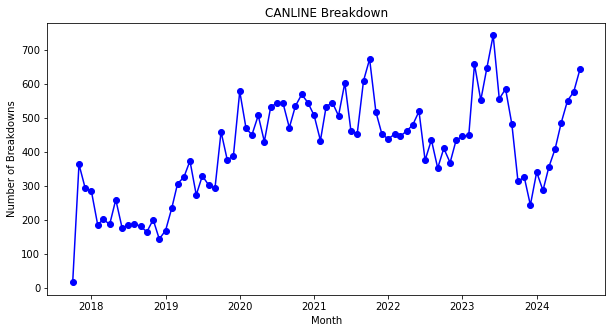

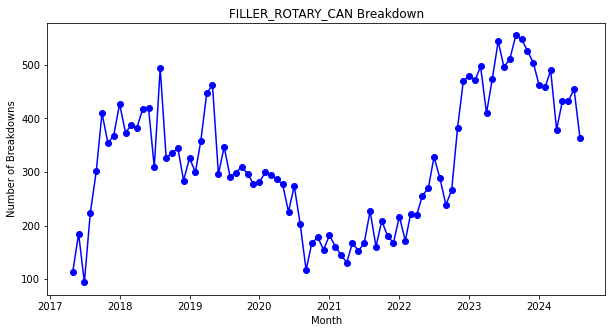

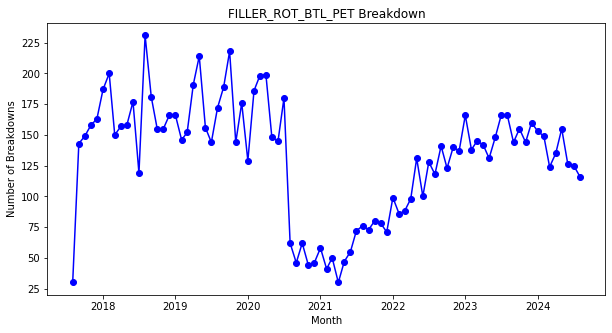

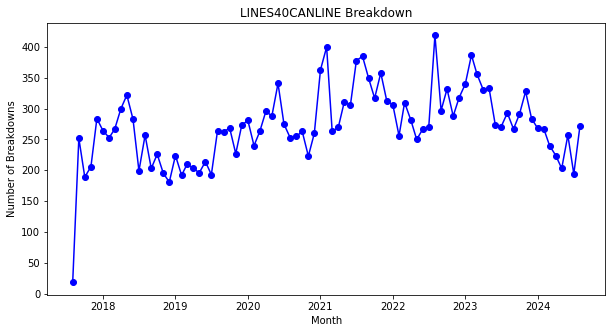

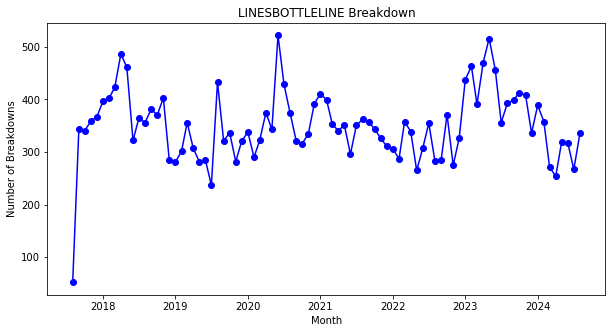

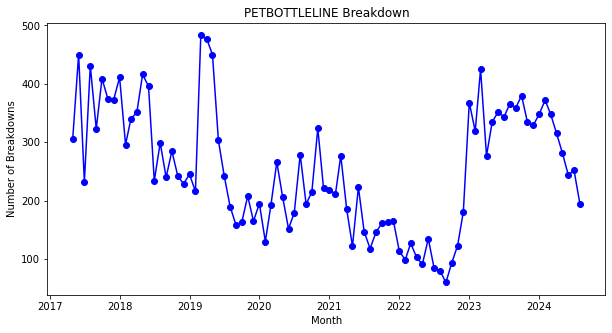

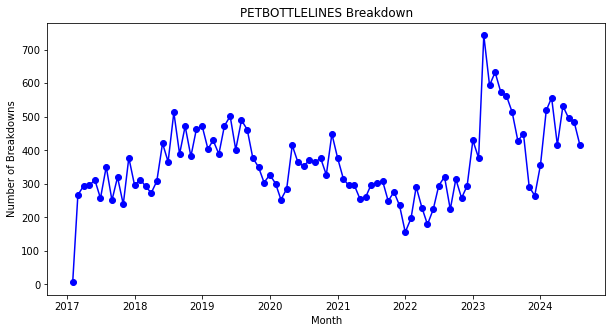

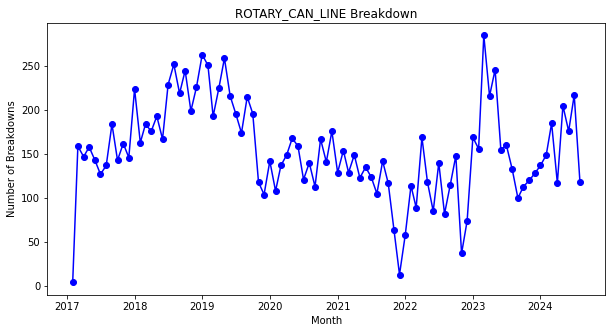

In [8]:
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'])
df['Month'] = df['EXECUTION_START_DATE'].dt.to_period('M').dt.to_timestamp()

for item in breakdown_list:
    plot_df = df[df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] == item].groupby('Month').count()
    plot_df = plot_df.reset_index()
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(plot_df['Month'], plot_df['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
    plt.title(f'{item} Breakdown')
    plt.xlabel('Month')
    plt.ylabel('Number of Breakdowns')
    plt.show()

## Finding top Maitenance by Plant

In [44]:
# most maitenance items by location
distinct_locations = df.groupby('PRODUCTION_LOCATION').count()
location_list = distinct_locations.index.tolist()

final_df = pd.DataFrame()

# Iterate through the list and append DataFrames
for location in location_list:
    # Create a DataFrame from the current item in the list
    temp_df = df[df['PRODUCTION_LOCATION']== location].groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED').count()
    temp_df['type'] = location
    temp_df = temp_df.reset_index()
    
    # Append it to the final DataFrame using pd.concat
    final_df = pd.concat([final_df, temp_df], ignore_index=True)

final_df

,FUNCTIONAL_AREA_NODE_2_MODIFIED,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,...,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,type
0,AIR,528,528,528,528,528,528,528,528,480,...,225,225,0,528,0,0,0,0,0,COTA
1,BOTTLELINE,27543,27543,27543,27543,27543,27543,27543,27543,8789,...,27543,25937,0,27543,2425,2425,2425,2425,2425,COTA
2,CANLINE,34208,34208,34208,34208,34208,34208,34208,34208,10535,...,34208,33381,0,34208,10418,10418,10418,10418,10418,COTA
3,CIP,7,7,7,7,7,7,7,7,0,...,7,7,0,7,0,0,0,0,0,COTA
4,CO,473,473,473,473,473,473,473,473,395,...,0,0,0,473,4,4,4,4,4,COTA
5,FLEETFUNCTIONALAREA,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,COTA
6,HEATING,344,344,344,344,344,344,344,344,236,...,202,202,0,344,0,0,0,0,0,COTA
7,NITROGEN,13,13,13,13,13,13,13,13,0,...,0,0,0,13,0,0,0,0,0,COTA
8,OFFICE,3,3,3,3,3,3,3,3,0,...,3,0,0,3,0,0,0,0,0,COTA
9,PRODUCTION,159,159,159,159,159,159,159,159,151,...,159,0,0,159,0,0,0,0,0,COTA


## Most Common Repairs by Plant

Roma

In [53]:
roma = final_df[final_df['type'] == 'ROMA']
grouped_data = roma.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].sum()
roma_grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
FILLER_ROTARY_CAN            17390
FILLER_ROT_BTL_PET           11200
SHOP/REPAIRAREA               4930
SYRUP/BLENDINGROOM             600
WATER                          242
AIR                            199
RECYCLING                      158
REFRIGERATION                  140
FLEETFUNCTIONALAREA            122
CO                              79
STEAM                           59
SAFETYEQUIPMENT                 49
WASTEWATER                      33
PRODUCTION                      21
CIP                             18
QUALITYASSURANCEEQUIPMENT       17
SANITATION                       3
Name: MAINTENANCE_ACTIVITY_TYPE, dtype: int64

Monaco

In [54]:
monaco = final_df[final_df['type'] == 'MONACO']
grouped_data = monaco.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].sum()
monaco_grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
LINEPETBOTTLELINE            8153
LINECAN                      3959
STEAM                        2169
CO                           1189
COMMONEQUIPMENT/LINE          773
REFRIGERATION                 758
PRODUCTION/FACILITIE          711
AIR                           259
SAFETYEQUIPMENT               223
SYRUP/BLENDINGROOM            207
GROUND                        174
NEWWATERPLANT                 170
SHOP/REPAIRAREA               163
RECYCLING                     110
WATER                         110
CIP                            71
SUGAR/HFC                      22
OZONE                           1
QUALITYASSURANCEEQUIPMENT       1
Name: MAINTENANCE_ACTIVITY_TYPE, dtype: int64

Silverstone

In [55]:
silverstone = final_df[final_df['type'] == 'SILVERSTONE']
grouped_data = silverstone.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].sum()
silerstone_grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
LINESBOTTLELINE              29729
LINES40CANLINE               23153
COMMONEQUIPMENT               3069
RECYCLING                     1378
LINE8BIBLINE                  1197
OFFICE                         852
SYRUP/BLENDINGROOM             688
WATER                          642
REFRIGERATION                  612
CO                             422
AIR                            245
HEATING                        181
NITROGEN                       118
SANITATION                      91
WASTEWATER                      82
QUALITYASSURANCEEQUIPMENT       78
CIP                             52
SHOP/REPAIRAREA                 28
PRODUCTION                       6
MOBILEEQUIPMENT                  1
SAFETYEQUIPMENT                  1
Name: MAINTENANCE_ACTIVITY_TYPE, dtype: int64

COTA

In [57]:
cota = final_df[final_df['type'] == 'COTA']
cota_grouped_data = cota.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].sum()
cota_grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
CANLINE                      34208
BOTTLELINE                   27543
SYRUP/BLENDINGROOM            3033
REFRIGERATION                 1235
WATER                          764
AIR                            528
CO                             473
HEATING                        344
RECYCLING                      299
WASTEWATER                     227
PRODUCTION                     159
QUALITYASSURANCEEQUIPMENT       88
WAREHOUSE                       32
SANITATION                      15
NITROGEN                        13
CIP                              7
OFFICE                           3
FLEETFUNCTIONALAREA              1
Name: MAINTENANCE_ACTIVITY_TYPE, dtype: int64

MONZA

In [59]:
monza = final_df[final_df['type'] == 'MONZA']
monza_grouped_data = monza.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].sum()
monza_grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
PETBOTTLELINES               32789
ROTARY_CAN_LINE              14016
WATER                         2474
AIR                           2315
WASTEWATER                    1070
AMMONIAREFRIGERATION           835
RECYCLING                      755
NITROGEN                       446
SHOP/REPAIRAREA                393
CO                             305
SYRUP/BLENDINGROOM             290
QUALITYASSURANCEEQUIPMENT      275
SAFETYEQUIPMENT                187
WAREHOUSE                      164
MOBILEEQUIPMENT                155
PRODUCTION                     146
LOADINGDOCK                     94
STEAM                           85
SANITATION                      59
LUBECAGE                        49
OFFICE                          48
CHEMICALROOM                    14
ELECTRICAL                      14
LISSYSTEM                        1
Name: MAINTENANCE_ACTIVITY_TYPE, dtype: int64

SUZUKA

In [60]:
suzuka = final_df[final_df['type'] == 'SUZUKA']
suzuka_grouped_data = suzuka.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].sum()
suzuka_grouped_data.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_2_MODIFIED
PETBOTTLELINE                22460
FILLER_ROTARY_CAN            10799
COOLERSERVICEHVAC             2699
REFRIGERATION                  822
WATER                          563
SYRUP/BLENDINGROOM             456
AIR                            306
HEATING                        280
WASTEWATER                     254
NEWPMPLAN                      211
CIP                            203
SANITATION                      87
CO                              75
RECYCLING                       75
QUALITYASSURANCEEQUIPMENT       44
NITROGEN                        14
Name: MAINTENANCE_ACTIVITY_TYPE, dtype: int64

## Trends in Maitenance

## Most Common Breakdowns Trends

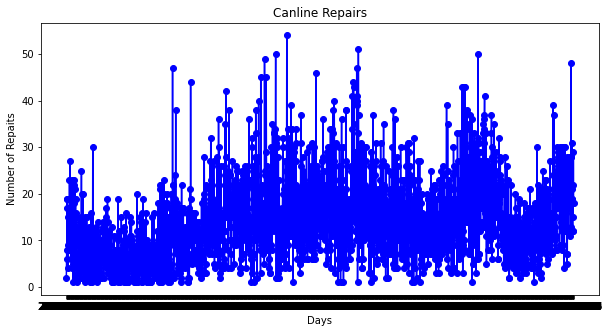

In [68]:
import matplotlib.pyplot as plt
canline = df[df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] == 'CANLINE'].groupby('EXECUTION_START_DATE').count()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(canline.index, canline['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('Canline Repairs')
plt.xlabel('Days')
plt.ylabel('Number of Repairs')
plt.show()

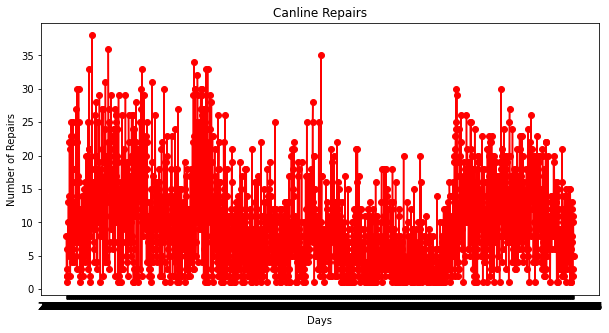

In [69]:
pet_bottle = df[df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] == 'PETBOTTLELINE'].groupby('EXECUTION_START_DATE').count()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(pet_bottle.index, pet_bottle['ORDER_ID'], marker='o', linestyle='-', color='r')  # Line plot with markers
plt.title('Pet Bottle Line Repairs')
plt.xlabel('Days')
plt.ylabel('Number of Repairs')
plt.show()

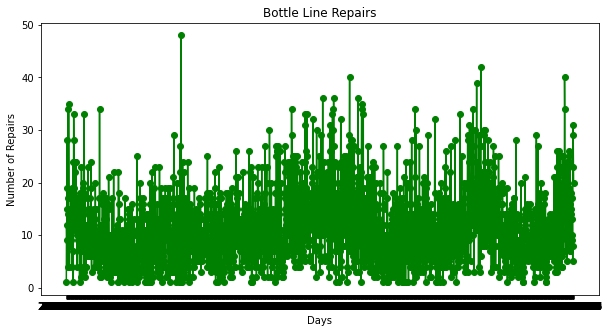

In [70]:
bottle_line = df[df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] == 'BOTTLELINE'].groupby('EXECUTION_START_DATE').count()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(bottle_line.index, bottle_line['ORDER_ID'], marker='o', linestyle='-', color='g')  # Line plot with markers
plt.title('Bottle Line Repairs')
plt.xlabel('Days')
plt.ylabel('Number of Repairs')
plt.show()

## Eqiupment Replacement

In [72]:
# by plant
grouped_data = df.groupby(['PRODUCTION_LOCATION','EQUIPMENT_DESC'])['MAINTENANCE_ACTIVITY_TYPE'].count()
grouped_data.sort_values(ascending=False)

PRODUCTION_LOCATION  EQUIPMENT_DESC                          
COTA                 L1 FILLER_ROTARY_CAN_72_VALVE               3745
MONZA                L1 FILLER_ROTARY_BTL_60_VALVE               2738
                     L4 FILLER_ROTARY_CAN_100_VALVE              2511
                     L2 FILLER_ROTARY_BTL_45_VALVE               2072
                     L3 LABELER_ROTARY                           1955
                     L4 SEAMER_ROTARY                            1853
                     L4 PACKER_CASE                              1576
                     L3 PACKER KHS TSP80V                        1536
                     L3 FILLER_ROTARY_BTL_100_VALVE              1474
                     LINE 1 LABELER_ROTARY                       1472
                     L1 CAPPER_RTRY                              1320
COTA                 L3 PACKR_CASE_WESTROCK_DD1250M              1180
MONZA                L2 PALLETIZER_LINE 2_PAI                    1101
COTA                 L2 LABE

In [89]:
grouped_data = df.groupby(['PRODUCTION_LOCATION','EQUIPMENT_DESC']).nunique()
grouped_data.sort_values(by = ['PRODUCTION_LOCATION','ORDER_ID'], ascending=False)

ORDER_ID  \
PRODUCTION_LOCATION EQUIPMENT_DESC                                       
SUZUKA              L04 KRONES PALLETIZER                          152   
                    L04 PACKR_CASE_KHS_TSP A-M                     120   
                    L04 MICROBLEND/MIXER                            52   
                    LINE2 CHILLER                                   26   
                    LINE4 CHILLER                                   25   
                    L04 PALLET LABEL APPLICATOR                     19   
                    L02 PALLET LABEL APPLICATOR                     11   
                    TURBIDITY METER                                  5   
                    EAU ECA  GENERATOR                               4   
                    SULLAIR 200 HP COMP.                             4   
                    OZONE LINE 6                                     3   
SILVERSTONE         L2 LINE 2 FILLER                               354   
                    L2 PALLETIZER_T-TEK_TS-0075                    323   
                    L2 LABELER_LINEAR_BTL_TRINE_WEST_4600G         293   
                    L2 LABELER_LINEAR_BTL_TRINE_EAST_4600G         242   
                    L1 DETECTOR_FILL_VISION_PRESSCO FHCP3X         213   
                    CODER_INKJET_LEIBINGER_JET3                     77   
                    L9 WMR_SPRAY_UNIPAC                             50   
                    L3 INTERLOX_ CASE_DIVERTER_S7050                46   
                    L10 DEPALLETIZER                                20   
                    L10 PALITIZER_T-TEK_EAST                        20   
                    MAX_O2_ANALYZER_MAX_BEV_01                      20   
                    L10 PACKR_CASE_MEAD_1250M                       18   
                    L9 CONV_TT_BTL_FULL                             16   
                    L10 CONV_FULL CAN_MASS CONVEYOR                 14   
                    COND_EVAP_NH3_ATC-1708E_WEST                     9   
                    L10 PALITIZER_T-TEK_WEST                         7   
                    L10 WRAPPER_STRETCH_LANTECH_WEST                 7   
                    DESALITECH_R.O._SYSTEM_R-20                      6   
                    COND_EVAP_NH3_ATC-1708E_EAST                     5   
                    L10 CSW_LID_FEEDER                               5   
                    L10 FILLER_ROTARY_CAN_                           4   
                    L9 WATER_HEATER_DIR_FIRE_L9                      4   
                    ERGO_ASSIST_FILM_LIFT                            3   
                    L10 CODER_CARTON_MEAD_WEST                       3   
                    L10 PACKR_CASE_KHS/KISTER_TSP A-M                3   
                    L10 CAN INSPECTION_EMPTY CAN-SOUTH               2   
                    L10 CONV_CASE/CARTON SORTER                      2   
                    L10 DETECTOR_FILL_FILTEC_WEST                    2   
                    L10 FUME EXTRACTION_EMPTY CAN_SOUTH              2   
                    L10 FUME EXTRACTION_MEAD_EAST                    2   
                    L10 FUME EXTRACTION_MEAD_WEST                    2   
                    GOODWAY_DRY STEAM _CLEANER_GVC-18000             1   
                    L10 CODER_CARTON_MEAD_EAST                       1   
                    L10 CODER_LASER_DOMINO_EMPTY_CAN_SOUTH           1   
                    L10 CONV_FULL_ PALLET_WEST                       1   
                    L10 FLIM LIFT_KISTER                             1   
                    L10 FUME EXTRACTION_EMPTY CAN_NORTH              1   
                    L10 WARMER_DESCON                                1   
                    L10 WATER HEATER-ARMSTRONG                       1   
                    L10 WRAPPER_STRETCH_LANTECH_EAST                 1   
                    LAB_EQUIP_DENSITY_METER_SYRUP_LAB                1   
ROMA                L3 FILLER_ROTARY_CAN_124_VALVE                

## Top Replacements by Production Location

COTA: L1 FILLER_ROTARY_CAN_72_VALVE 

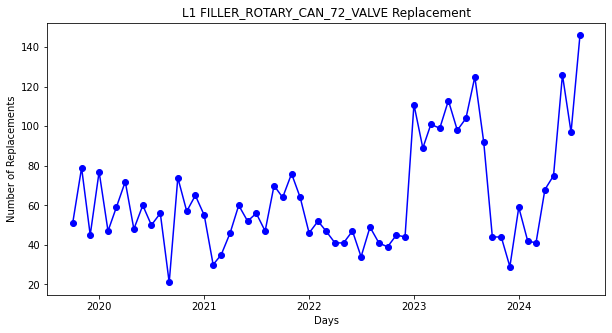

In [82]:
# create month column
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'])
df['Month'] = df['EXECUTION_START_DATE'].dt.to_period('M').dt.to_timestamp()

# create df
valve_72 = df[df['EQUIPMENT_DESC'] == 'L1 FILLER_ROTARY_CAN_72_VALVE'].groupby('Month').count()
valve_72 = valve_72.reset_index()

# create plot
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(valve_72['Month'], valve_72['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('L1 FILLER_ROTARY_CAN_72_VALVE Replacement')
plt.xlabel('Month')
plt.ylabel('Number of Replacements')
plt.show()

MONACO: ILBM COOLING TOWER

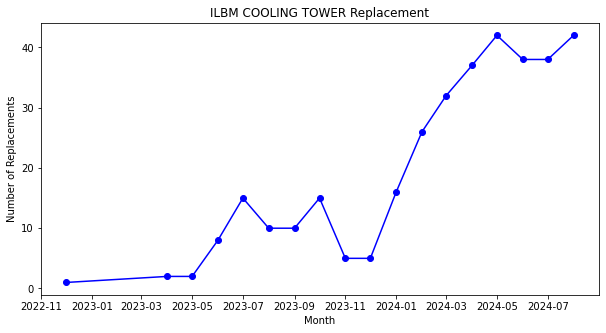

In [90]:
ilbm = df[df['EQUIPMENT_DESC'] == 'ILBM COOLING TOWER'].groupby('Month').count()
ilbm = ilbm.reset_index()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(ilbm['Month'], ilbm['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('ILBM COOLING TOWER Replacement')
plt.xlabel('Month')
plt.ylabel('Number of Replacements')
plt.show()

Monza: L1 FILLER_ROTARY_BTL_60_VALVE

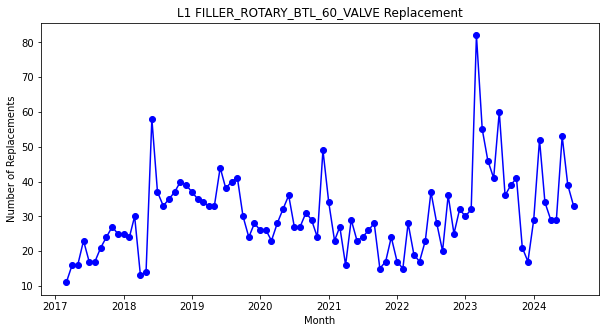

In [91]:
valve_60 = df[df['EQUIPMENT_DESC'] == 'L1 FILLER_ROTARY_BTL_60_VALVE'].groupby('Month').count()
valve_60 = valve_60.reset_index()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(valve_60['Month'], valve_60['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('L1 FILLER_ROTARY_BTL_60_VALVE Replacement')
plt.xlabel('Month')
plt.ylabel('Number of Replacements')
plt.show()

ROMA: L3 FILLER_ROTARY_CAN_124_VALVE	

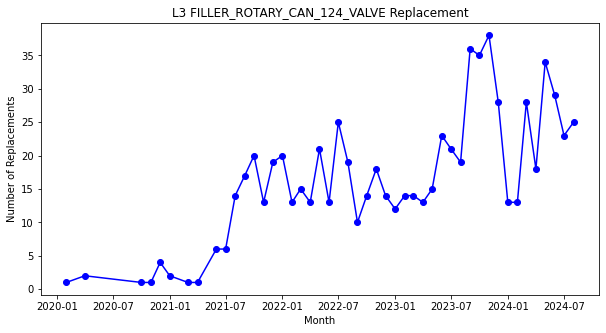

In [92]:
valve_124 = df[df['EQUIPMENT_DESC'] == 'L3 FILLER_ROTARY_CAN_124_VALVE'].groupby('Month').count()
valve_124 = valve_124.reset_index()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(valve_124['Month'], valve_124['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('L3 FILLER_ROTARY_CAN_124_VALVE Replacement')
plt.xlabel('Month')
plt.ylabel('Number of Replacements')
plt.show()

SILVERSTONE: L2 LINE 2 FILLER

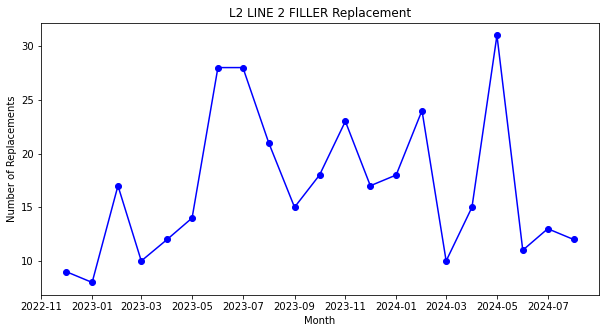

In [93]:
l2_line = df[df['EQUIPMENT_DESC'] == 'L2 LINE 2 FILLER'].groupby('Month').count()
l2_line = l2_line.reset_index()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(l2_line['Month'], l2_line['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('L2 LINE 2 FILLER Replacement')
plt.xlabel('Month')
plt.ylabel('Number of Replacements')
plt.show()

SUZUKA: L04 KRONES PALLETIZER

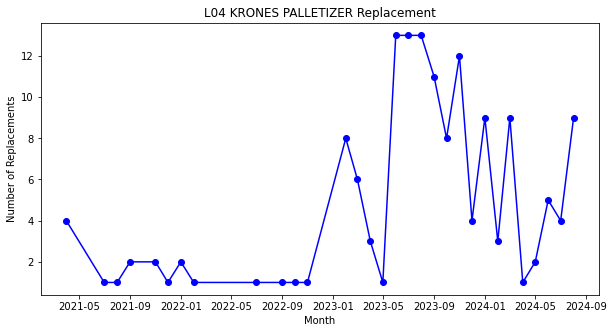

In [94]:
l04 = df[df['EQUIPMENT_DESC'] == 'L04 KRONES PALLETIZER'].groupby('Month').count()
l04 = l04.reset_index()
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(l04['Month'], l04['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('L04 KRONES PALLETIZER Replacement')
plt.xlabel('Month')
plt.ylabel('Number of Replacements')
plt.show()

In [97]:
grouped_data = df.groupby(['PRODUCTION_LOCATION','EQUIPMENT_DESC'])['MAINTENANCE_ACTIVITY_TYPE'].count()
# Reset the index to convert the result to a DataFrame
grouped_data = grouped_data.reset_index()

# Rename the count column
grouped_data = grouped_data.rename(columns={'MAINTENANCE_ACTIVITY_TYPE': 'Activity_Count'})

df_for_list = grouped_data[grouped_data['Activity_Count']> 1000]
equipment_list = df_for_list['EQUIPMENT_DESC'].tolist()
equipment_list

['L1 FILLER_ROTARY_CAN_72_VALVE',
 'L2 LABELER_BOTTLE_TRINE 4600_#1',
 'L3 PACKR_CASE_WESTROCK_DD1250M',
 'L1 CAPPER_RTRY',
 'L1 FILLER_ROTARY_BTL_60_VALVE',
 'L2 CAPPER_RTRY_9HD',
 'L2 FILLER_ROTARY_BTL_45_VALVE',
 'L2 PALLETIZER_LINE 2_PAI',
 'L3 FILLER_ROTARY_BTL_100_VALVE',
 'L3 LABELER_ROTARY',
 'L3 PACKER KHS TSP80V',
 'L4 FILLER_ROTARY_CAN_100_VALVE',
 'L4 PACKER_CASE',
 'L4 SEAMER_ROTARY',
 'LINE 1 LABELER_ROTARY']

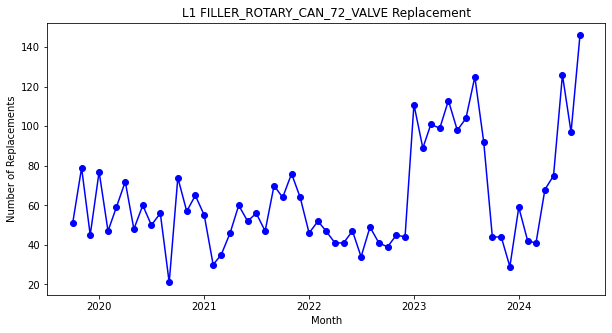

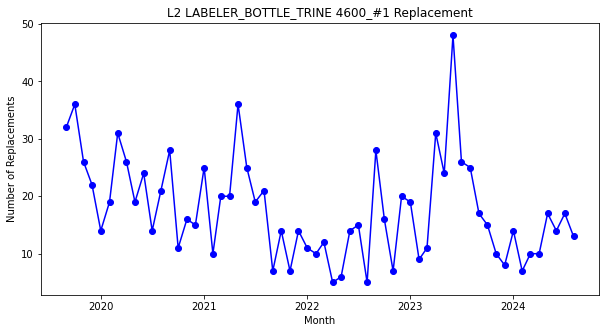

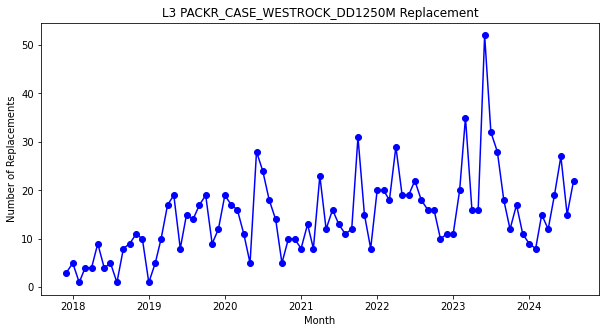

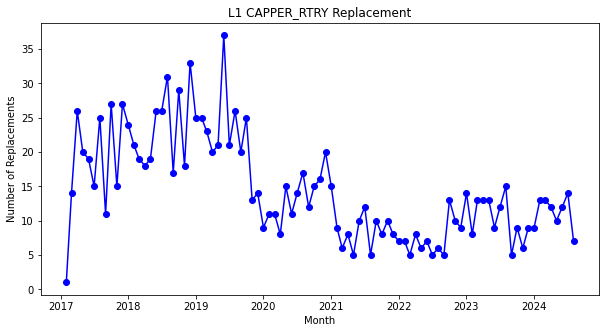

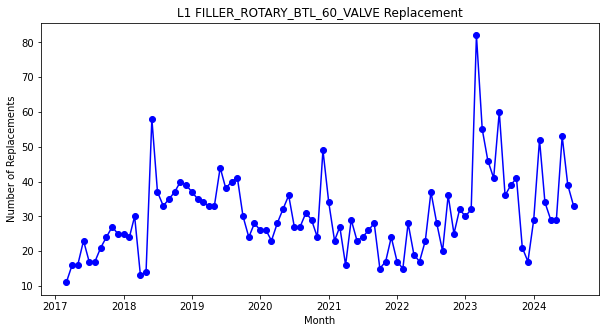

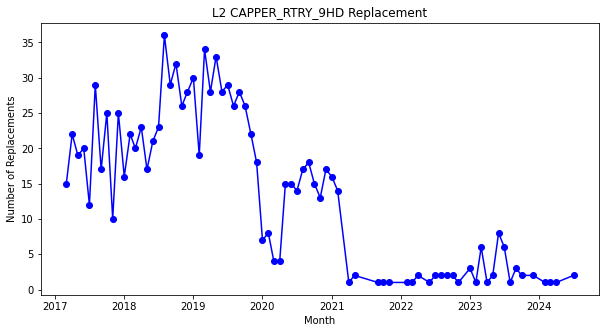

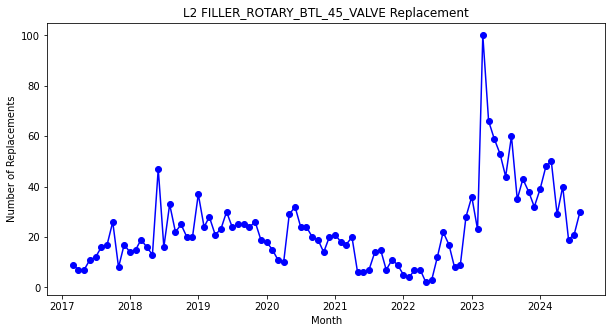

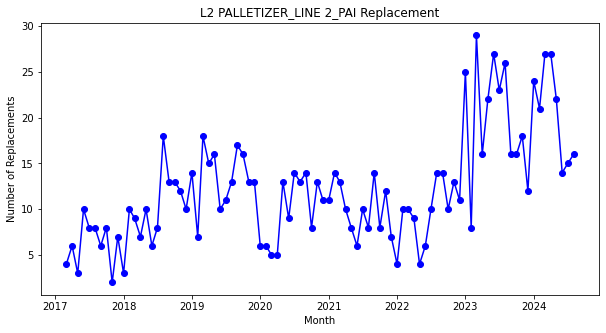

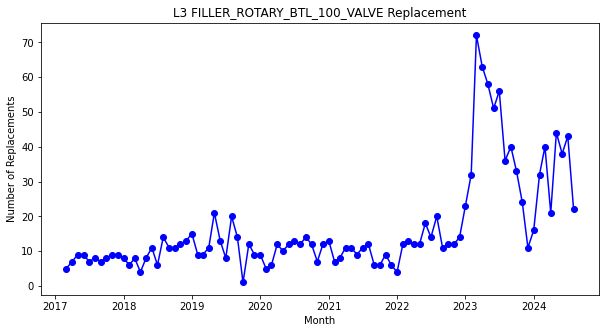

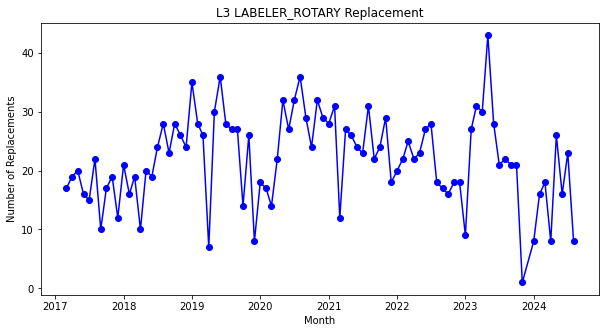

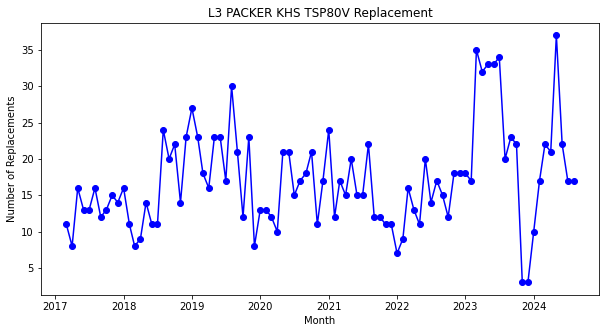

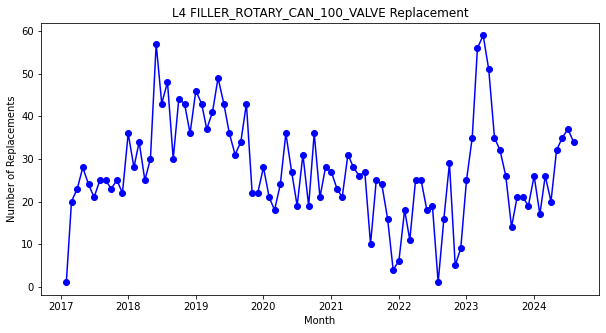

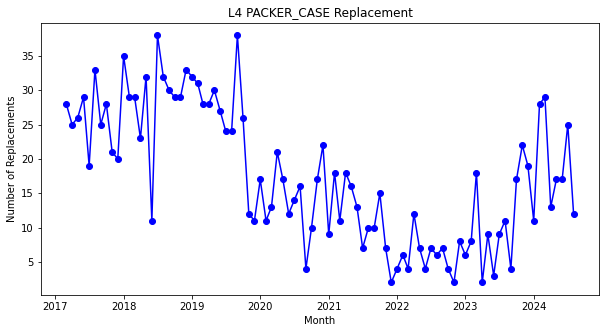

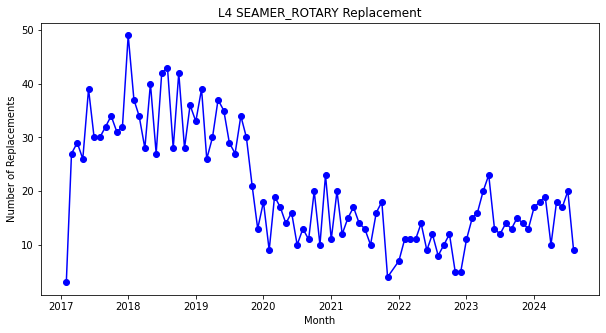

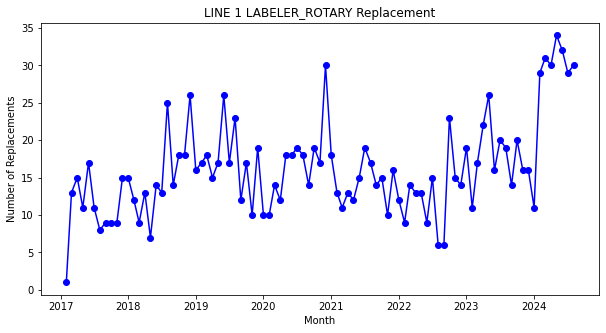

In [100]:
for item in equipment_list:
    plot_df = df[df['EQUIPMENT_DESC'] == item].groupby('Month').count()
    plot_df = plot_df.reset_index()
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(plot_df['Month'], plot_df['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
    plt.title(f'{item} Replacement')
    plt.xlabel('Month')
    plt.ylabel('Number of Replacements')
    plt.show()

## Variable Choice
While it would be very helpful to predict replacements, to know better what parts to store and to have them available before the breakage occurs to reduce production line downtime, I think it's better to begin with predicting breakages. Breakages give us a direct look into exactly what is stopping the production line. I am going to start with LINES40CANLINE it is one of the most common breakdowns.

### LINES40CANLINE Breakdown Time Series Model

In [14]:
lines_40_caline = df[df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] == 'LINES40CANLINE'].groupby('Month').count()
lines_40_caline = lines_40_caline.reset_index()
lines_40_caline

,Month,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,2017-08-01,18,18,18,18,18,18,18,18,0,...,18,18,18,0,18,0,0,0,0,0
1,2017-09-01,252,252,252,252,252,252,252,252,107,...,252,252,248,0,252,0,0,0,0,0
2,2017-10-01,189,189,189,189,189,189,189,189,60,...,189,189,188,0,189,0,0,0,0,0
3,2017-11-01,206,206,206,206,206,206,206,206,68,...,206,206,195,0,206,0,0,0,0,0
4,2017-12-01,284,284,284,284,284,284,284,284,119,...,284,284,278,0,284,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2024-04-01,224,224,224,224,224,224,224,224,112,...,224,224,221,0,224,0,0,0,0,0
81,2024-05-01,203,203,203,203,203,203,203,203,93,...,203,203,202,0,203,2,2,2,2,2
82,2024-06-01,257,257,257,257,257,257,257,257,117,...,257,257,250,0,257,21,21,21,21,21
83,2024-07-01,194,194,194,194,194,194,194,194,98,...,194,194,193,0,194,27,27,27,27,27


In [16]:
# Assuming 'Month' is in datetime format, convert it to numerical format
lines_40_caline['Month'] = pd.to_datetime(lines_40_caline['Month'])

# Option 1: Extract month and year as separate numerical features
lines_40_caline['Month_Num'] = lines_40_caline['Month'].dt.month
lines_40_caline['Year_Num'] = lines_40_caline['Month'].dt.year

# Define feature and target variables using the extracted numerical values
X = lines_40_caline[['Year_Num', 'Month_Num']]  # Using both Year and Month as features
y = lines_40_caline['ORDER_ID']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Squared Error: 4942.032615997948
R-squared: 0.2013057473524591
Model Coefficients: [ 9.53096282 -0.69428529]
Model Intercept: -18980.362932690954


### Regression Model Explanation
This linear regression model is trying to predict the ORDER_ID (number of orders or order-related metric) based on the year and month. The model assumes a linear relationship between these variables and the ORDER_ID.

If the coefficients are positive, it means that as the time progresses (i.e., the year or month increases), the ORDER_ID tends to increase. If the coefficients are negative, it means that the ORDER_ID tends to decrease as the time progresses.

In practical terms, this model could be used to forecast future ORDER_ID values based on the year and month, helping with demand planning, logistics, or business strategy.

### Durbin Watson Test

In [17]:
from statsmodels.stats.stattools import durbin_watson

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (the difference between actual and predicted values)
residuals = y_test - y_pred

# Perform Durbin-Watson test on the residuals
dw_statistic = durbin_watson(residuals)

# Output the Durbin-Watson statistic
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 2.091268566977939


Explanation:
 - Residuals: These are the differences between the actual y_test values and the predicted values y_pred. The Durbin-Watson test is applied to these residuals.

Durbin-Watson test: The durbin_watson() function from the statsmodels library calculates the Durbin-Watson statistic.
Interpreting the Result:
- Durbin-Watson Statistic = 2: No autocorrelation.
- Durbin-Watson Statistic < 2: Positive autocorrelation in the residuals (values closer to 0 indicate stronger positive autocorrelation).
- Durbin-Watson Statistic > 2: Negative autocorrelation (values closer to 4 indicate stronger negative autocorrelation).

After running the code, we see that there is no autocorrelation.


In [18]:
from statsmodels.tsa.stattools import adfuller

# Ensure 'Month' column is in datetime format
lines_40_caline['Month'] = pd.to_datetime(lines_40_caline['Month'])

# Set 'Month' as the index (this is common for time series data)
lines_40_caline.set_index('Month', inplace=True)

# Extract the 'ORDER_ID' column as the time series data
time_series = lines_40_caline['ORDER_ID']

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(time_series)

# Output the test statistics and results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis).")


ADF Statistic: -3.333521219613799
p-value: 0.013444971649115449
Critical Values: {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}
The time series is stationary (reject the null hypothesis).


Explanation:

ADF Statistic: This is the test statistic for the ADF test. The more negative this value, the stronger the rejection of the hypothesis that there is a unit root (i.e., the series is non-stationary).
p-value: This is the probability that the series is non-stationary. A small p-value (typically < 0.05) suggests that you can reject the null hypothesis and conclude that the series is stationary.
Critical Values: These are the critical values for different confidence levels (1%, 5%, 10%). You can compare the ADF statistic to these values to determine whether to reject the null hypothesis of a unit root.
Interpretation:
If the ADF statistic is less than the critical value and the p-value is small (e.g., < 0.05), you can reject the null hypothesis and conclude that the time series is stationary.
If the ADF statistic is greater than the critical value or the p-value is large (e.g., > 0.05), you fail to reject the null hypothesis, meaning the time series is non-stationary.

We identified The time series is stationary (reject the null hypothesis).

A stationary time series is one whose statistical properties, such as mean, variance, and autocovariance, remain constant over time. Stationarity is a key assumption in many time series models, as it implies that the behavior of the series is predictable and does not change with time.

Here are some characteristics of a stationary time series:

Constant Mean: The average value of the series stays the same over time.

Constant Variance: The variability or spread of the data around the mean remains constant.

Constant Autocovariance Structure: The relationship between observations (measured by autocovariance) is only dependent on the time gap between them, not on their absolute position in the series.

<Figure size 720x432 with 0 Axes>

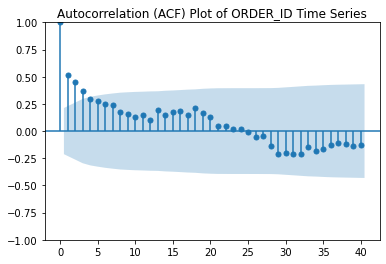

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
lines_40_caline = lines_40_caline.reset_index()
# Ensure 'Month' is in datetime format and set as index
lines_40_caline['Month'] = pd.to_datetime(lines_40_caline['Month'])
lines_40_caline.set_index('Month', inplace=True)

# Extract the 'ORDER_ID' time series data
time_series = lines_40_caline['ORDER_ID']

# Create the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=40)  # You can change lags as needed
plt.title('Autocorrelation (ACF) Plot of ORDER_ID Time Series')
plt.show()


Explanation:

ACF Plot: The plot_acf() function generates the ACF plot for the ORDER_ID time series.
lags=40: This sets the number of lags to display on the plot (change this based on your needs). The lags represent the number of time steps (e.g., months) to check autocorrelation with.
time_series: This is the time series data (ORDER_ID), which we want to analyze for autocorrelation.

Interpretation of the ACF Plot:

The plot shows the autocorrelation coefficients on the y-axis and the lag number on the x-axis.
If the bars fall outside the confidence interval, this indicates significant autocorrelation at that lag.
Positive autocorrelation: Bars above zero.
Negative autocorrelation: Bars below zero.

Interpretation of a High Lag-1 Autocorrelation
Persistence: The high autocorrelation at lag 1 indicates that the values of the series are closely related from one period to the next, showing strong persistence. This is typical in non-stationary series, where values tend to "drift" rather than fluctuate independently.

Trend: Often, a high lag-1 autocorrelation is an indication that the series might have a trend. If values are very similar from one time step to the next, this can suggest that the series is moving in a particular direction (upward or downward) rather than fluctuating randomly around a mean.

Need for Differencing: If you observe high autocorrelation at lag 1 and also at several successive lags, it can indicate non-stationarity. In such cases, differencing the series (e.g., taking the difference between successive values) may help to remove the trend and achieve stationarity, making the series more suitable for modeling.


<Figure size 720x432 with 0 Axes>

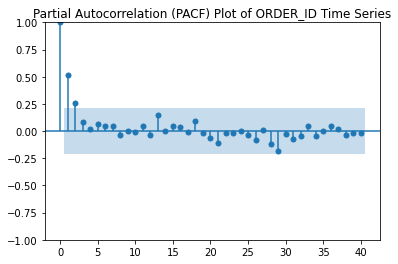

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

# Extract the 'ORDER_ID' time series data
time_series = lines_40_caline['ORDER_ID']

# Create the PACF plot
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=40, method='ywm')  # 'ywm' method is commonly used for PACF
plt.title('Partial Autocorrelation (PACF) Plot of ORDER_ID Time Series')
plt.show()


Explanation:
    
PACF Plot: The plot_pacf() function generates the PACF plot for the ORDER_ID time series.
lags=40: This specifies how many lags to include in the plot. You can adjust this number based on how far back you want to look.
method='ywm': This specifies the method used for computing the PACF. 'ywm' is a commonly used method, but you can try others like 'ols' if needed.
time_series: The ORDER_ID column represents the time series data that we are analyzing.

Interpretation of the PACF Plot:

The PACF plot shows the partial autocorrelation of the time series with different lag values.
Partial autocorrelation removes the influence of shorter lag values, allowing you to see the direct relationship between the time series and its lag at a given point.
Significant spikes at certain lags (bars that fall outside the confidence interval) indicate that the time series has partial autocorrelation at those lags.

Interpretation of Spike at Lag 0:

Lag 0 Represents the Current Value: The spike at lag 0 reflects the relationship of the time series with itself at the current period. Essentially, it's a measure of how well the current observation correlates with itself, which is always perfectly correlated (value of 1).
Redundant Information: In practical terms, since the lag 0 correlation is always 1, it doesn’t provide useful information about the time series’ dynamics. Instead, you typically focus on the spikes at positive lags (1, 2, 3, etc.) to assess how past values influence the current value.

What If Lag 0 Is Significant?
If you're observing significant spikes at other lags (e.g., lag 1 or higher) but still see a spike at lag 0, it simply reinforces the idea that the current value is directly influenced by itself (which is always the case).

Example Context:
In Autoregressive Models (AR): If there is a significant spike at lag 1 (and potentially beyond), it suggests that past values have a meaningful influence on the current value. The presence of a significant spike at lag 0 is not problematic; it just reflects the inherent correlation that exists at that point.
In summary, while a spike at lag 0 indicates perfect correlation with the current observation, it does not carry additional information for model fitting or understanding time series dynamics. Focus should be directed towards the spikes at positive lags to determine the influence of past values on the current observation.


## ARIMA Model

/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               ORDER_ID   No. Observations:                   85
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -446.127
Date:                Sun, 13 Oct 2024   AIC                            896.255
Time:                        15:30:59   BIC                            901.116
Sample:                    08-01-2017   HQIC                           898.209
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4088      0.099     -4.130      0.000      -0.603      -0.215
sigma2      2396.8165    257.582      9.305      0.000    1891.965    2901.668
Ljung-Box (L1) (Q):                   0.10   Jarque-

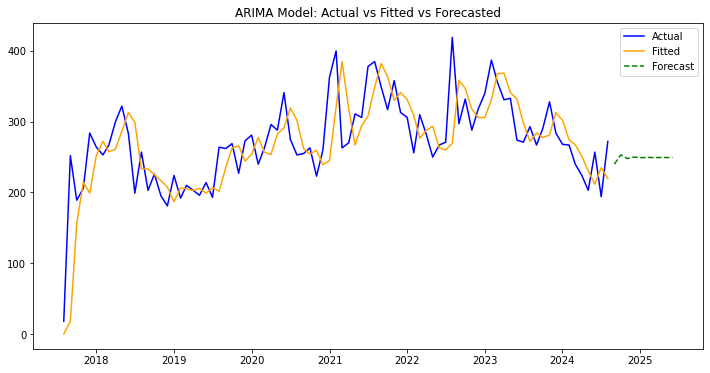

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lines_40_caline = lines_40_caline.reset_index()

# Ensure 'Month' is in datetime format and set as index
lines_40_caline['Month'] = pd.to_datetime(lines_40_caline['Month'])
lines_40_caline.set_index('Month', inplace=True)

# Extract the 'ORDER_ID' time series data
time_series = lines_40_caline['ORDER_ID']

# Define the ARIMA parameters
p = 1  # autoregressive order
d = 1  # differencing order (typically 1 for a stationary series)
q = 0  # moving average order

# Fit the ARIMA model
model = ARIMA(time_series, order=(p, d, q))
fitted_model = model.fit()

# Output model summary
print(fitted_model.summary())

# Forecasting the next 10 periods
forecast = fitted_model.forecast(steps=10)
print("Forecasted values for the next 10 periods:")
print(forecast)

# Plotting the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual', color='blue')
plt.plot(fitted_model.fittedvalues, label='Fitted', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title('ARIMA Model: Actual vs Fitted vs Forecasted')
plt.legend()
plt.show()


The results from your SARIMAX model provide a comprehensive overview of the fit of the ARIMA(1, 1, 0) model to your ORDER_ID time series data. Here’s a breakdown of the key components of the results and what they mean:

Model Overview:
Dep. Variable: The dependent variable in the model is ORDER_ID.
No. Observations: There are 85 observations in your dataset.
Model: The model used is ARIMA(1, 1, 0), which consists of:
p (autoregressive order): 1
d (differencing order): 1
q (moving average order): 0

Log Likelihood and Information Criteria:
Log Likelihood: The log likelihood of -446.127 indicates how well the model explains the data. Higher values (closer to zero) typically indicate a better fit.
AIC (Akaike Information Criterion): The AIC of 896.255 provides a means of model comparison; lower values suggest a better model fit.
BIC (Bayesian Information Criterion): The BIC of 901.116 also aids in model comparison, with lower values preferred.
HQIC (Hannan-Quinn Information Criterion): Similar to AIC and BIC, with a value of 898.209.

Coefficients:
ar.L1 (-0.4088): This coefficient represents the autoregressive term. A negative value suggests that an increase in the previous month's ORDER_ID leads to a decrease in the current month's ORDER_ID. The coefficient is statistically significant with a p-value of 0.000 (p < 0.05), indicating that the relationship is unlikely due to random chance.
sigma2 (2396.8165): This is the estimated variance of the residual errors. A higher value indicates more variability in the data that is not explained by the model.

Residual Diagnostics:
Ljung-Box (Q) Test:

Q Statistic (0.10): This test checks for autocorrelation in the residuals. A low value suggests that there is no significant autocorrelation.
Prob(Q) (0.76): A high p-value indicates that you fail to reject the null hypothesis of no autocorrelation in the residuals, suggesting that the model fits well.

Jarque-Bera (JB) Test:
JB Statistic (64.86): This test checks for normality in the residuals. A high value suggests the residuals may not be normally distributed.
Prob(JB) (0.00): A low p-value indicates strong evidence against the null hypothesis of normality, suggesting that the residuals may not follow a normal distribution.
Heteroskedasticity Test:
Heteroskedasticity (H) (0.67): This indicates the presence of constant variance in the residuals.
Prob(H) (0.29): The high p-value indicates that we fail to reject the null hypothesis of constant variance.

Forecasted Values:
The forecasted values for the next 10 periods (months) are:

Date	Forecasted ORDER_ID
2024-09-01	240.11
2024-10-01	253.15
2024-11-01	247.82
2024-12-01	250.00
2025-01-01	249.11
2025-02-01	249.47
2025-03-01	249.32
2025-04-01	249.38
2025-05-01	249.36
2025-06-01	249.37

Interpretation of Forecasts:

The forecasted values indicate the expected ORDER_ID for each subsequent month. The forecasts show slight fluctuations but tend to stabilize around the 249-250 range after an initial increase.
These values can assist in planning and decision-making, especially if you're trying to anticipate demand or resource allocation based on expected orders.

Conclusion:

Overall, the model appears to capture the dynamics of the time series well, with significant autoregressive effects and no major autocorrelation in the residuals. However, the normality of the residuals is a concern, which could suggest that there are patterns in the data that the model has not fully captured. You may want to explore potential transformations or include additional predictors (seasonality, external factors) to improve model performance.

## Auto ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=907.230, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=897.988, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=894.277, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=905.510, Time=0.01 sec


/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=896.127, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=896.165, Time=0.07 sec


/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=892.577, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=894.433, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=894.469, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=896.255, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=895.358, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.928 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -444.288
Date:                Sun, 13 Oct 2024   AIC                            892.577
Time:                        15:37:15   BIC                            897.439
Sample:                    08-01-2017   HQIC                           894.531
                         - 08-01-2024                          

/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


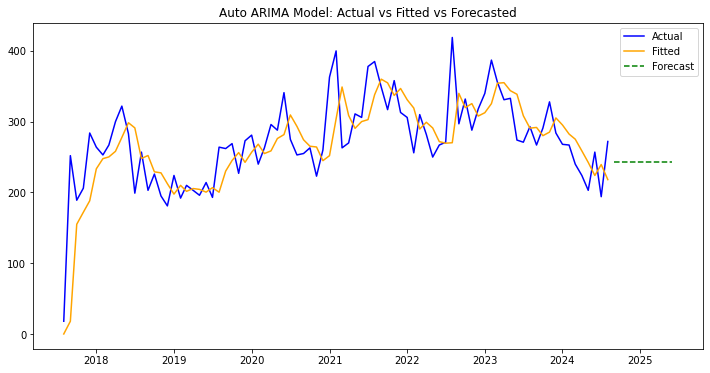

In [26]:
from pmdarima import auto_arima

lines_40_caline = lines_40_caline.reset_index()

# Ensure 'Month' is in datetime format and set as index
lines_40_caline['Month'] = pd.to_datetime(lines_40_caline['Month'])
lines_40_caline.set_index('Month', inplace=True)

# Extract the 'ORDER_ID' time series data
time_series = lines_40_caline['ORDER_ID']

# Fit the Auto ARIMA model
auto_model = auto_arima(time_series, seasonal=False, stepwise=True, trace=True)

# Output model summary
print(auto_model.summary())

# Forecasting the next 10 periods
forecast = auto_model.predict(n_periods=10)
forecast_index = pd.date_range(start=time_series.index[-1] + pd.DateOffset(1), periods=10, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plotting the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual', color='blue')
plt.plot(auto_model.predict_in_sample(), label='Fitted', color='orange')
plt.plot(forecast_series, label='Forecast', color='green', linestyle='--')
plt.title('Auto ARIMA Model: Actual vs Fitted vs Forecasted')
plt.legend()
plt.show()


Model Selection Summary:
Model Comparisons:
ARIMA(1,1,2)(0,0,0)[0]: AIC=inf indicates that this model did not converge or failed to produce a valid result, so it was excluded from consideration.
ARIMA(0,1,1)(0,0,0)[0]: AIC=892.577 is the lowest AIC among the considered models, indicating it is the best model based on this criterion.
Other models like ARIMA(1,1,1)(0,0,0)[0], ARIMA(0,1,2)(0,0,0)[0], and ARIMA(1,1,0)(0,0,0)[0] have higher AIC values (894.433, 894.469, and 896.255, respectively).
Best Model:
The best model identified is ARIMA(0,1,1)(0,0,0)[0]. This model has the lowest AIC of 892.577, indicating it provides the best fit to the data among the tested models while balancing complexity and goodness of fit.
Total Fit Time: The model fitting process took 0.928 seconds, which is relatively quick given the number of models evaluated.
SARIMAX Results for the Best Model (ARIMA(0,1,1)):
Dep. Variable: The dependent variable in this model is denoted as y, which corresponds to your time series data (ORDER_ID).
No. Observations: The model was fitted using 85 observations from your dataset.
Log Likelihood: The log likelihood value of -444.288 indicates how well the model explains the data; higher values (closer to zero) suggest better fits.
Information Criteria:

AIC (Akaike Information Criterion): 892.577. Lower AIC values suggest a better model. This value is lower than other candidate models, indicating it has a good balance of fit and complexity.
BIC (Bayesian Information Criterion): 897.439. Similar to AIC but adds a larger penalty for the number of parameters. Lower values are better.
HQIC (Hannan-Quinn Information Criterion): 894.531, another criterion for model selection with a different penalty scheme.
Coefficients:

ma.L1 (-0.5311): This is the coefficient for the moving average term (MA). The negative coefficient suggests that a positive error (residual) in the previous period leads to a negative effect on the current period. The coefficient is statistically significant (p-value = 0.000).
sigma2 (2289.9484): This is the estimated variance of the residuals (errors). A higher value indicates greater variability in the data not explained by the model.
Residual Diagnostics:

Ljung-Box (Q) Test:
Q Statistic (1.29): This test checks for autocorrelation in the residuals.
Prob(Q) (0.26): A high p-value indicates that there is no significant autocorrelation in the residuals, which suggests that the model captures the underlying data structure well.
Jarque-Bera (JB) Test:
JB Statistic (59.84): Tests for normality of residuals.
Prob(JB) (0.00): A very low p-value suggests that the residuals are not normally distributed, which could indicate that the model may be missing some structure or that the data has outliers.
Heteroskedasticity Test:
Heteroskedasticity (H) (0.64): Indicates whether the residuals exhibit varying levels of volatility.
Prob(H) (0.25): A high p-value suggests that we fail to reject the null hypothesis of constant variance in the residuals.
Summary and Interpretation:
The selected model ARIMA(0,1,1) indicates that your time series data requires first differencing (d=1) to make it stationary and incorporates one lagged forecast error (moving average term, q=1).
The diagnostics suggest the model fits well with no significant autocorrelation in the residuals, although normality may be a concern due to the low p-value in the JB test.
The model captures the dynamics of the data adequately, making it a suitable choice for forecasting future values, but further investigation may be needed to address the normality issue.

Auto ARIMA outperformed the manual ARIMA so I will use Auto ARIMA

### Model Matrix

Model Matrix:
            const    y  lag_1
Month                        
2017-09-01    1.0  252   18.0
2017-10-01    1.0  189  252.0
2017-11-01    1.0  206  189.0
2017-12-01    1.0  284  206.0
2018-01-01    1.0  264  284.0
...           ...  ...    ...
2024-04-01    1.0  224  240.0
2024-05-01    1.0  203  224.0
2024-06-01    1.0  257  203.0
2024-07-01    1.0  194  257.0
2024-08-01    1.0  272  194.0

[84 rows x 3 columns]


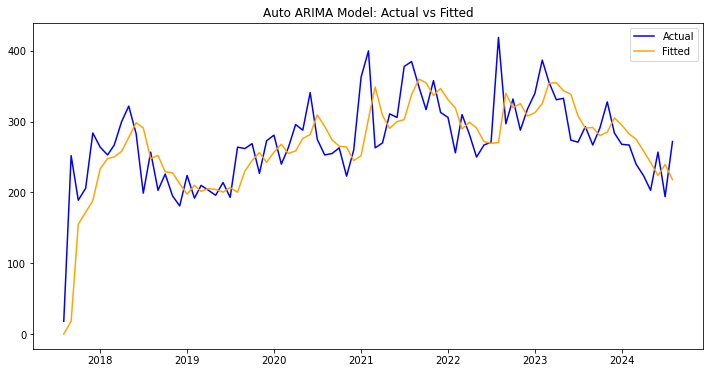

In [27]:
from statsmodels.tools import add_constant
# Create the model matrix
# For ARIMA(p, d, q), we only need the lags of the dependent variable
# Generate lagged features for the AR part
max_lag = max(auto_model.order[0], auto_model.order[2])  # max of p and q
lagged_data = pd.DataFrame({'y': time_series})
for i in range(1, max_lag + 1):
    lagged_data[f'lag_{i}'] = lagged_data['y'].shift(i)

# Drop NaN values created by shifting
lagged_data = lagged_data.dropna()

# Add a constant term for the intercept
lagged_data = add_constant(lagged_data)

# Show the model matrix
print("Model Matrix:")
print(lagged_data)

# Optionally plot the actual data with predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual', color='blue')
plt.plot(auto_model.predict_in_sample(), label='Fitted', color='orange')
plt.title('Auto ARIMA Model: Actual vs Fitted')
plt.legend()
plt.show()

The model matrix created here focuses on the lagged values for the autoregressive part of the ARIMA model. In ARIMA modeling, the design matrix is less straightforward than in traditional regression, but this approach helps visualize how the lagged values are structured.

Significance in Modeling:
The model matrix allows the ARIMA model to incorporate previous values (in this case, just the lag of one month) to make predictions about the current or future values. This is crucial for capturing time dependencies.
By using lagged values, the model can account for trends and seasonality inherent in the time series data, thus improving the accuracy of the forecasts.

Summary:
The model matrix provides a structured format for the data that the ARIMA model will use, incorporating both the actual observed values and their previous values. This enables the model to leverage historical data to make informed predictions about future values of ORDER_ID.

## Extract Coefficient and Standard Errors

In [30]:
# Extracting coefficients and standard errors
# For pmdarima's auto_arima, we need to convert it to a statsmodels-like object for full details
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the best parameters found
best_order = auto_model.order
model = ARIMA(time_series, order=best_order).fit()

# Extract coefficients and standard errors
coefficients = model.params
standard_errors = model.bse
p_values = model.pvalues

# Create a DataFrame to display coefficients and standard errors together
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    'P-Value': p_values
})

# Print the results
print(results_df)

        Coefficient  Standard Error       P-Value
ma.L1     -0.531119        0.094096  1.657439e-08
sigma2  2289.948370      242.355388  3.429970e-21


/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1. ma.L1 Coefficient
Value: -0.531119
Interpretation:
The coefficient for ma.L1 (the first lag of the moving average component) indicates the influence of the previous error term on the current observation.
A negative value means that when the previous error term is positive (indicating that the previous prediction was lower than the actual observation), the current observation will tend to be lower as well, and vice versa. This reflects an inverse relationship.
In practical terms, a value of -0.531119 suggests that approximately 53.1% of the previous error is reflected in the current observation, indicating a significant impact of the past error on the current value.
2. Standard Error of ma.L1
Value: 0.094096
Interpretation:
The standard error measures the variability or uncertainty of the coefficient estimate. A lower standard error relative to the coefficient indicates a more precise estimate.
In this case, a standard error of 0.094096 for the ma.L1 coefficient suggests that the estimate of -0.531119 is relatively precise. The standard error can be used to construct confidence intervals for the coefficient, which can give you a range of values within which the true coefficient is likely to fall.
3. sigma2 Coefficient
Value: 2289.948370
Interpretation:
The sigma2 coefficient represents the estimated variance of the residuals (errors) of the model. It indicates the level of volatility in the series after accounting for the effects of the ARIMA model.
A higher sigma2 value suggests that there is greater variability in the residuals, meaning that the data points are more dispersed around the predicted values.
In this case, a sigma2 value of 2289.948370 indicates that the residuals have a relatively high level of variance.
4. Standard Error of sigma2
Value: 242.355388
Interpretation:
The standard error for sigma2 also measures the uncertainty of this estimate. A lower standard error indicates more confidence in the variance estimate.
In this case, a standard error of 242.355388 suggests there is some uncertainty around the variance estimate. This can be considered in the context of the size of the variance itself.
Summary:
The ma.L1 coefficient of -0.531119 indicates a significant negative relationship with past errors, while the sigma2 coefficient of 2289.948370 reflects the level of variability in the model's residuals.
Both coefficients have associated standard errors that provide a measure of their precision. These results help assess how well the ARIMA model fits the data and how reliable the estimates are.

## P-values
The p-values you provided are associated with the coefficients of the fitted ARIMA model and provide insight into the statistical significance of those coefficients. Here's an explanation of each:

1. ma.L1 Coefficient
Coefficient: -0.531119
Standard Error: 0.094096
P-Value: 1.657439e-08
Interpretation:

Significance: The p-value of 1.657439e-08 (or approximately 0.0000000165) is extremely low, indicating that the coefficient for the moving average term (ma.L1) is statistically significant.
Rejection of Null Hypothesis: In hypothesis testing, a common threshold for significance is 0.05. Since this p-value is far below that threshold, you would reject the null hypothesis that the coefficient is equal to zero. This means that the previous error term significantly affects the current observation.
Impact: Given that the coefficient is negative (-0.531119), this implies that when the previous error term (the difference between predicted and actual values) is positive, it tends to pull the current observation down, and vice versa.
2. sigma2 Coefficient
Coefficient: 2289.948370
Standard Error: 242.355388
P-Value: 3.429970e-21
Interpretation:

Significance: The p-value of 3.429970e-21 (or approximately 0.00000000000000000000034) is also extremely low, indicating that the coefficient for sigma2, which represents the variance of the residuals, is statistically significant.
Rejection of Null Hypothesis: Similar to the ma.L1 coefficient, you would reject the null hypothesis that sigma2 is equal to zero. This means that the variance of the residuals is significantly different from zero, indicating that there is variability in the errors that the model captures.
Impact: A positive sigma2 value indicates the level of volatility in the time series data after accounting for the model. The significance suggests that this volatility is a meaningful aspect of the data.
Summary
Overall Significance: Both p-values are extremely small, indicating that the effects modeled by ma.L1 and sigma2 are statistically significant.
Practical Implications: This means that the ARIMA model captures important dynamics of the time series data. The moving average component (ma.L1) significantly influences the current values, and the residual variance is significantly different from zero, which suggests that the model is likely appropriate for the data.
Conclusion
The very low p-values suggest that both the moving average component and the volatility captured by sigma2 are crucial for accurately modeling the underlying process of the time series. This significance strengthens confidence in the results of the ARIMA model and its predictions.

## Residuals

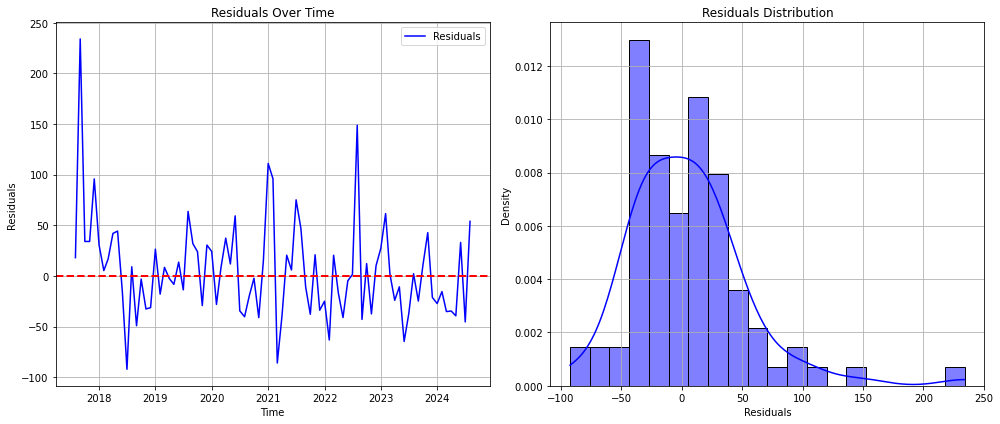

In [31]:
# Extract residuals
residuals = model.resid

# Plot residuals over time
plt.figure(figsize=(14, 6))

# Residuals Line Plot
plt.subplot(1, 2, 1)
plt.plot(residuals, color='blue', label='Residuals')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid()

# Residuals Histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=20, kde=True, color='blue', stat="density")
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid()

plt.tight_layout()
plt.show()

Interpretation of the Plots:
Residuals Over Time: Ideally, the residuals should be randomly distributed around zero with no apparent trend. There are higher residuals at the beginning followed by random distribution. Potentially this could mean throw out the first few years of data to ensure stable residuals.
Residuals Distribution: The histogram should resemble a normal distribution (bell curve) centered around zero. Significant skewness or kurtosis can indicate model misspecification. Here you see that the residuals are centered around 0 with no apparent trend.

In [33]:
import statsmodels.api as sm
# Get residuals
residuals = model.resid

# Calculate Pseudo R-squared
# Log-Likelihood of the fitted model
log_likelihood_fitted = model.llf

# Fit the null model (mean model)
mean_model = ARIMA(lines_40_caline['ORDER_ID'], order=(0, 1, 0)).fit()
log_likelihood_null = mean_model.llf

pseudo_r_squared = 1 - (log_likelihood_null / log_likelihood_fitted)

# Calculate OLS R-squared
# For OLS, we need to use a constant and lagged value as predictors
X = sm.add_constant(lines_40_caline['ORDER_ID'].shift(1).dropna())
y = lines_40_caline['ORDER_ID'].dropna()[1:]  # Align y with X

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Get R-squared from OLS model
ols_r_squared = ols_model.rsquared

# Output the results
print("Residuals:")
print(residuals)
print("\nPseudo R-squared (ARIMA):", pseudo_r_squared)
print("OLS R-squared:", ols_r_squared)

Residuals:
Month
2017-08-01     18.000000
2017-09-01    234.021828
2017-10-01     33.994841
2017-11-01     34.001943
2017-12-01     95.766679
                 ...    
2024-04-01    -34.714600
2024-05-01    -39.437571
2024-06-01     33.053972
2024-07-01    -45.444420
2024-08-01     53.863622
Length: 85, dtype: float64

Pseudo R-squared (ARIMA): -0.016805756047446163
OLS R-squared: 0.334183082130049


/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kimbuesser/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1. Residuals
The residuals represent the difference between the observed values of the target variable (in this case, ORDER_ID) and the values predicted by the ARIMA model. Here are some key points about the residuals:

Values:
For example, on 2017-08-01, the residual is 18.00, meaning the model predicted a value that was 18 units lower than the actual observed value.
In 2024-05-01, the residual is -39.44, indicating the model predicted a value that was 39.44 units higher than the actual observed value.
Distribution:
If you visualize these residuals, you would want to see them centered around zero with no clear pattern. A wide spread of residuals can indicate that the model is not capturing all the dynamics of the data.
Large positive or negative residuals (like 234.02 or -45.44) might suggest points where the model's predictions are far off from actual values, indicating potential areas where the model might need improvement or further tuning.

2. Pseudo R-squared (ARIMA)
Value: -0.0168
Interpretation:
The Pseudo R-squared is a measure of model fit. In this case, the value is slightly negative, which is unusual as Pseudo R-squared values typically range from 0 to 1.
A negative Pseudo R-squared suggests that the ARIMA model performs worse than the null model (mean-only model) in explaining the variability of the data.
This could indicate that the ARIMA model is not adequately capturing the underlying patterns in the data, or it might suggest that the chosen order of the ARIMA model is not suitable.

3. OLS R-squared
Value: 0.3342
Interpretation:
The OLS R-squared value indicates that approximately 33.42% of the variance in the dependent variable (ORDER_ID) can be explained by the independent variable(s) used in the OLS regression.
While this value is better than the Pseudo R-squared from the ARIMA model, it also indicates that there is a significant amount of variability in ORDER_ID that is not captured by the model.
A value of around 0.33 may imply that there are other important factors or variables influencing ORDER_ID that are not included in the model, or it may indicate a need for more sophisticated modeling techniques.

Summary
Residuals indicate the prediction errors of your ARIMA model. Analyzing them can provide insights into how well the model performs.
Pseudo R-squared for the ARIMA model suggests poor fit compared to a mean-only model, which calls for further investigation or adjustments to the model.
OLS R-squared indicates a moderate level of explained variance, implying that while the OLS model captures some relationship, significant variability remains unexplained.


# FB Prophet Model

16:06:02 - cmdstanpy - INFO - Chain [1] start processing
16:06:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 2333.5011058592345
R-squared: 0.3443795719253677


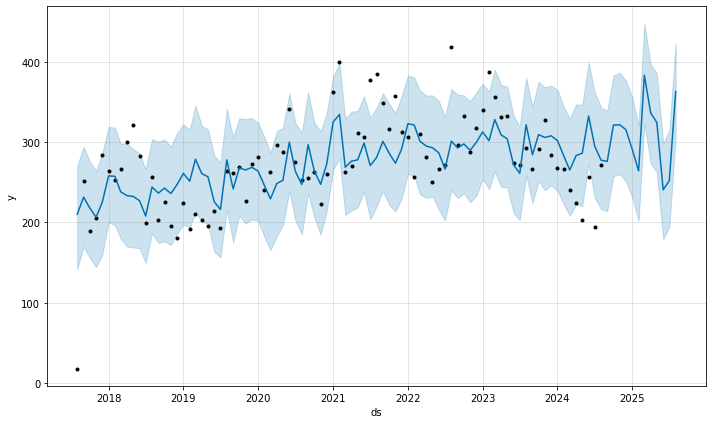

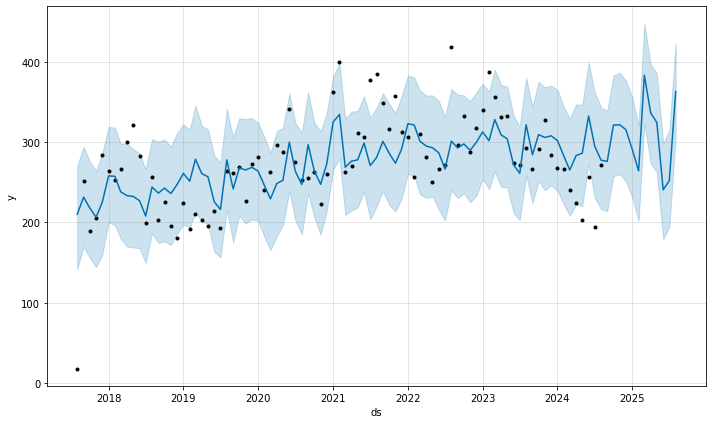

In [36]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
lines_40_caline=lines_40_caline.reset_index()

lines_40_caline['Month'] = pd.to_datetime(lines_40_caline['Month'])

# Prepare the data for Prophet
prophet_data = lines_40_caline.rename(columns={'Month': 'ds', 'ORDER_ID': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make a future DataFrame for predictions (for the next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = model.predict(future)

# Evaluate the model
# Align the predictions with actual data
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[lines_40_caline['Month']]
actual = lines_40_caline.set_index('Month')

# Calculate performance metrics
mse = mean_squared_error(actual['ORDER_ID'], predicted['yhat'])
r2 = r2_score(actual['ORDER_ID'], predicted['yhat'])

# Output results
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Plot the forecast
model.plot(forecast)


Explanation:
The R2 value for the base prophet model is 0.344 - already a better overall predictor of this specific breakdown over time than any of the ARIMA models that we tested. In a production setting, I would move forward using the Prophet model for overall better predictions and ease of use.